In [ ]:
SVM, XGboost, SGDclassifier ou RF

In [21]:
import pandas as pd

# options d'affichage
pd.set_option("display.min_rows", 20)
pd.set_option("display.max_column", 200)

In [22]:
df = pd.read_csv("./MobilePriceDescription/train.csv")
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,0,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,14,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,15,1137,1224,513,19,10,12,1,0,0,0


## 1/ Dataviz 

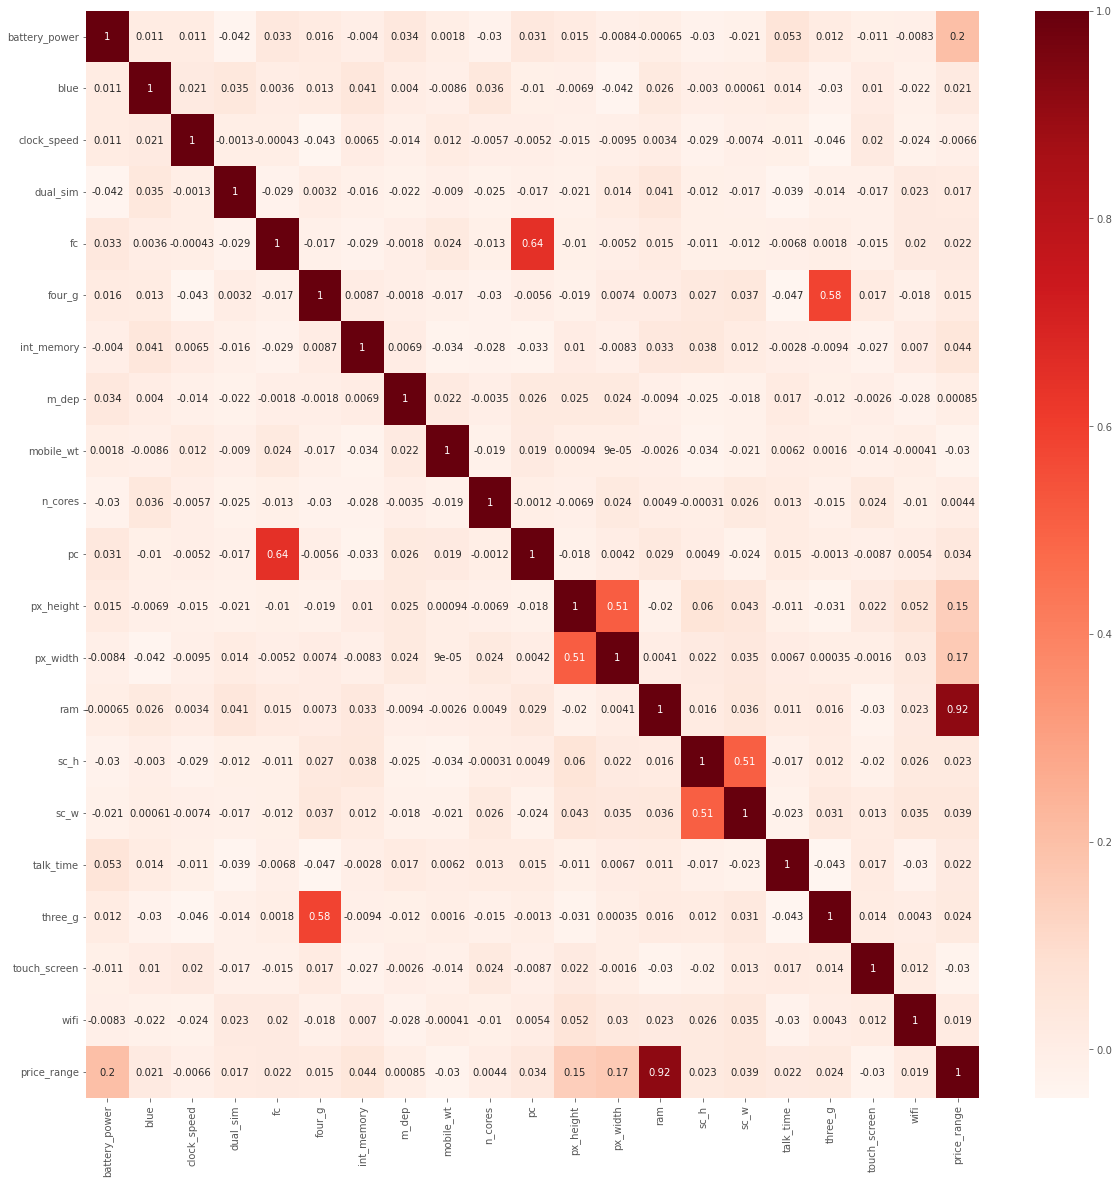

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,20))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [24]:
df.corr().style.background_gradient(cmap='viridis')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,-0.009952,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,-0.017143,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,-0.005598,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


In [25]:
import plotly.express as px
fig = px.histogram(df, x="ram", color="price_range", marginal="box", # can be `box`, `violin`, 'hug'
                         hover_data=df.columns)
fig.show()

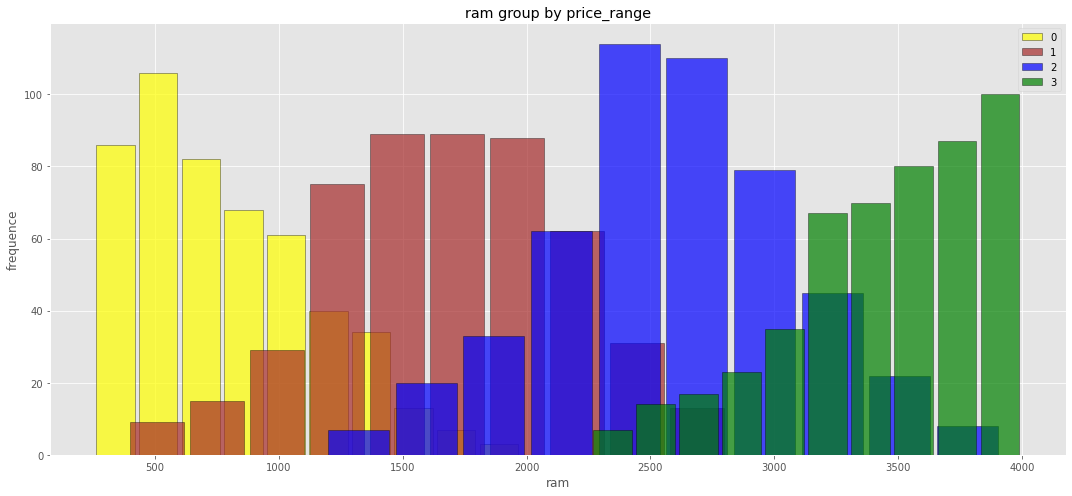

In [26]:
car_df = df.groupby('price_range')
car_df.groups.keys()
list(car_df.groups)
 
plt.style.use('ggplot')
plt.figure(figsize=(15,7))
plt.title('ram group by price_range')

for i in [0, 1, 2, 3]:
    color = ['yellow', 'brown', 'blue', 'green']
    plt.hist(car_df.get_group(i)['ram'], edgecolor='black',color=color[i],rwidth=0.9,alpha=0.7,label=str(i))
    

plt.legend(loc='upper right')
 
plt.xlabel('ram')
plt.ylabel('frequence')
 
plt.tight_layout()
 
plt.show()

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>]], dtype=object)

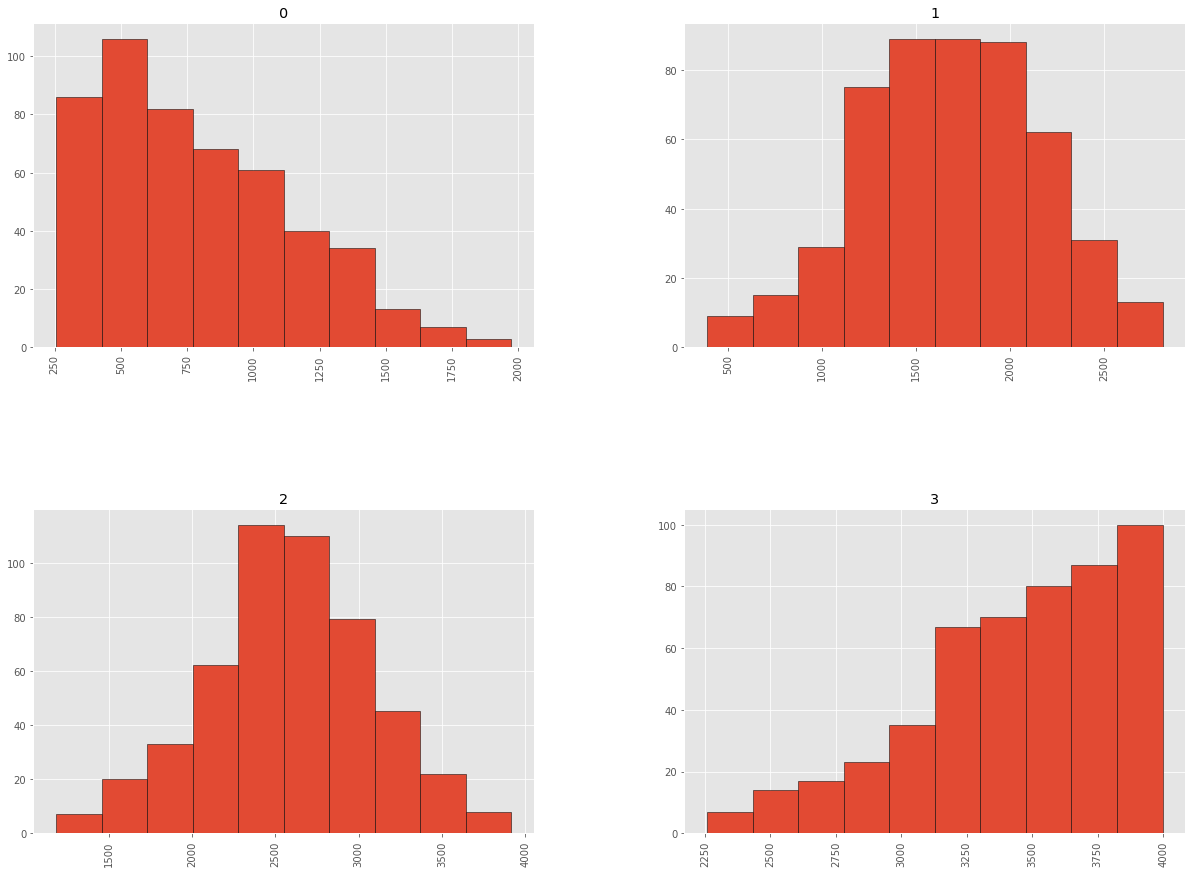

In [27]:
df['ram'].hist(by=df['price_range'], edgecolor='black', figsize = (20,15))

## 1/ Encoding

In [28]:
def unique_count(df,range_):
    for i in range_:
        if df.columns[i] == 'price_range':
            print(df.columns[i], " : ", len(df[df.columns[i]].unique()), " ", df[df.columns[i]].unique())
        else :
            print(df.columns[i], " : ", len(df[df.columns[i]].unique()))

unique_count(df, range(0,len(df.axes[1])))

battery_power  :  1094
blue  :  2
clock_speed  :  26
dual_sim  :  2
fc  :  20
four_g  :  2
int_memory  :  63
m_dep  :  10
mobile_wt  :  121
n_cores  :  8
pc  :  21
px_height  :  1137
px_width  :  1109
ram  :  1562
sc_h  :  15
sc_w  :  19
talk_time  :  19
three_g  :  2
touch_screen  :  2
wifi  :  2
price_range  :  4   [1 2 3 0]


In [29]:
def dual_value(df,range_):
    for i in range_:
        if len(df[df.columns[i]].unique()) < 3:
            print(df.columns[i], " : ", df[df.columns[i]].unique())
            
dual_value(df, range(0,len(df.axes[1])))

blue  :  [0 1]
dual_sim  :  [0 1]
four_g  :  [0 1]
three_g  :  [0 1]
touch_screen  :  [0 1]
wifi  :  [1 0]


In [30]:
def no_dual_value(df,range_):
    list_ = []
    for i in range_:
        if len(df[df.columns[i]].unique()) > 2 and df.columns[i] != 'price_range':
            list_.append(df.columns[i])
    return list_

list_columns_encoding = no_dual_value(df, range(0,len(df.axes[1])))
list_columns_encoding

['battery_power',
 'clock_speed',
 'fc',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time']

In [31]:
from sklearn.preprocessing import RobustScaler, PowerTransformer, StandardScaler

In [32]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df[list_columns_encoding]=ss.fit_transform(df[list_columns_encoding])
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,-0.902597,0,0.830779,0,-0.762495,0,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,0,0,1,1
1,-0.495139,1,-1.253064,1,-0.992890,1,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,1,1,0,2
2,-1.537686,1,-1.253064,1,-0.532099,1,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,1,1,0,2
3,-1.419319,1,1.198517,0,-0.992890,0,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,1,0,0,2
4,1.325906,1,-0.395011,0,2.002254,1,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,1,1,0,1
5,1.412405,0,-1.253064,1,-0.301703,0,-0.553795,0.687548,0.671107,-1.539175,-0.481048,0.808917,0.931480,-0.974874,1.114266,-1.094526,-0.185077,1,0,0,1
6,1.325906,0,0.217884,0,-0.071307,1,-1.215274,1.034357,-0.035292,1.521249,0.013773,-0.595280,-0.540431,1.010444,0.164641,0.512708,1.279430,1,0,1,3
7,1.628654,0,-1.253064,1,-0.992890,0,-0.443549,1.034357,1.320993,-0.227564,-1.635631,-0.300016,-0.237254,-1.313291,0.876859,-0.635317,-1.100394,1,1,1,0
8,0.470015,1,-1.253064,0,-0.992890,0,1.155024,0.687548,0.953666,1.084046,0.673534,-0.584011,-0.961638,-0.945367,1.114266,-1.094526,1.645557,1,0,0,0
9,-1.660607,1,-1.130485,1,-0.532099,1,-1.270397,-1.393304,-1.335064,0.209639,0.838474,1.108689,-0.063680,-1.485727,1.589078,0.971917,0.181050,1,0,0,0


## 3/ Modeling

In [33]:
from sklearn.model_selection import train_test_split, cross_val_score

x = df.drop(['price_range'], axis=1)
y = df['price_range']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

In [34]:
#verifier la distribution des outputs de test et de train : 
y_train_distrib = pd.DataFrame(y_train.value_counts()/y_train.value_counts().sum())
y_train_distrib["proportion"]="y_train"

y_test_distrib = pd.DataFrame(y_test.value_counts()/y_test.value_counts().sum())
y_test_distrib["proportion"]="y_test"


y_distrib = pd.concat([y_train_distrib, y_test_distrib])
y_distrib.reset_index(inplace=True)
y_distrib.rename(columns={"index": "price_r"}, inplace=True)
y_distrib.sort_values(by='price_r', inplace=True)
y_distrib["price_r"]=y_distrib["price_r"].astype(str)
y_distrib

,price_r,price_range,proportion
0,0,0.253750,y_train
7,0,0.235000,y_test
3,1,0.246875,y_train
4,1,0.262500,y_test
1,2,0.252500,y_train
6,2,0.240000,y_test
2,3,0.246875,y_train
5,3,0.262500,y_test


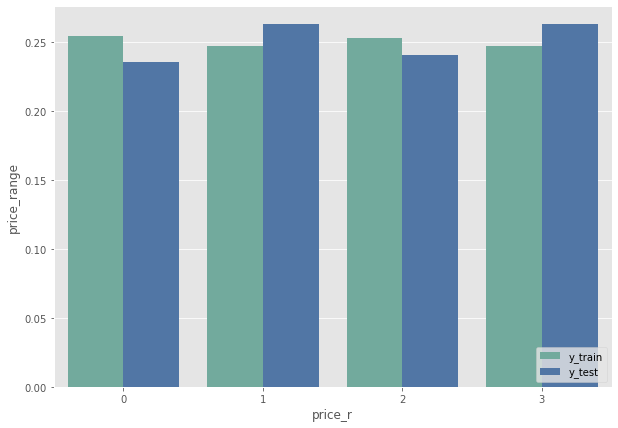

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
colors = ["#69b3a2", "#4374B3"]
sns.set_palette(sns.color_palette(colors))
plt.figure(figsize=(10, 7))
sns.barplot(x='price_r', y="price_range", hue="proportion", data=y_distrib, ci=None);
plt.legend(loc='lower right')

# Revoir les méthodes de selection de variables et d'encodage

### ***********************************************************Voting classifier***************************************************

In [70]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import VotingClassifier

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier


votes = [
     ('SVC', SVC(C=550, kernel='linear', random_state=3)),
     ('XGB', XGBClassifier(colsample_bytree=0.8045954527591985, learning_rate= 0.1, n_estimators= 700, max_depth=4, random_state=5, n_jobs=-1)),
     #('RF', RandomForestClassifier(n_estimators=1050, min_samples_split= 5, min_samples_leaf= 2, max_features='sqrt', max_depth=50, bootstrap=True, random_state=5, n_jobs=-1)),
     ('SGD', SGDClassifier(alpha=0.1, loss='squared_hinge', penalty='l1', class_weight= 'balanced', epsilon= 0.0001, learning_rate= 'adaptive', eta0=2, random_state=5))
]


# soft voting based on weights
votesClass = VotingClassifier(estimators=votes, voting='hard', n_jobs=-1)
#votesClass_cv = cross_validate(votesClass, x_train, y_train)
votesClass.fit(x_train, y_train)
votesClass.score(x_test, y_test)

0.965

In [68]:
votesClass.score(x_train, y_train)

0.995

### ***************************************************Stacking***********************************************************

In [69]:
#stacking classifier
from sklearn.ensemble import StackingClassifier

Stack_model = StackingClassifier([
     ('SVC', SVC(C=550, kernel='linear', random_state=3)),
     ('XGB', XGBClassifier(colsample_bytree=0.8045954527591985, learning_rate= 0.1, n_estimators= 700, max_depth=4, random_state=5, n_jobs=-1)),
     ('RF', RandomForestClassifier(n_estimators=1050, min_samples_split= 5, min_samples_leaf= 2, max_features='sqrt', max_depth=50, bootstrap=True, random_state=5, n_jobs=-1)),
     #('SGD', SGDClassifier(alpha=0.1, loss='squared_hinge', penalty='l1', class_weight= 'balanced', epsilon= 0.0001, learning_rate= 'adaptive', eta0=2, random_state=5))
],final_estimator= XGBClassifier(), n_jobs=-1)

Stack_model.fit(x_train, y_train)
Stack_model.score(x_test, y_test)

0.945

# Le reste est à revoir

In [42]:
#feature selection

X_trains_df=pd.DataFrame(x_train,columns=x_train.columns)
from sklearn.feature_selection import RFE
svc_lin=VotingClassifier(estimators=votes, voting='hard', n_jobs=-1)
svm_rfe_model=RFE(estimator=svc_lin)
svm_rfe_model_fit=svm_rfe_model.fit(X_trains_df,y_train)
feat_index = pd.Series(data = svm_rfe_model_fit.ranking_, index = x_train.columns)
signi_feat_rfe = feat_index[feat_index==1].index
print('Significant features from RFE',signi_feat_rfe)

ValueError: when `importance_getter=='auto'`, the underlying estimator VotingClassifier should have `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to feature selector or call fit before calling transform.

In [13]:
best_feature = list(signi_feat_rfe)
display(type(best_feature))
best_feature

list

['battery_power',
 'int_memory',
 'mobile_wt',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time']

In [14]:
X_trains_new=x_train[best_feature]
X_tests_new=x_test[best_feature]

rfe_RF=RandomForestClassifier(random_state=5)
rfe_RF=rfe_RF.fit(X_trains_new, y_train)
rfe_RF.score(X_tests_new, y_test) 

0.9125

### RFC/ Optimisation des hyper-paramètres (voir méthode de laurent + faire graph des évolution de l'accuracy en fonction des hyper-param) 

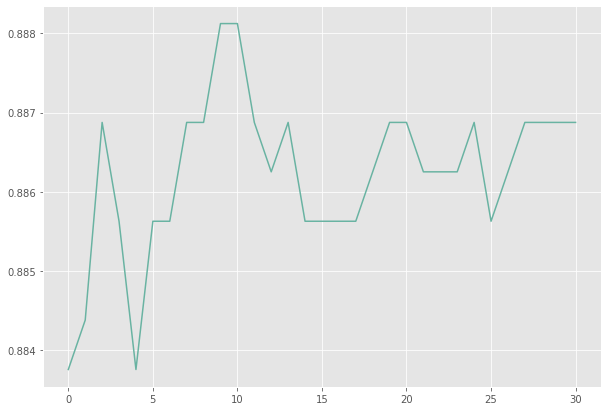

In [17]:
from sklearn.model_selection import cross_val_score
import numpy as np

val_score = []
for n_estimators in np.arange(500,2001,50):
    score = cross_val_score(RandomForestClassifier(n_estimators=n_estimators, random_state=5), X_trains_new, y_train, cv=5).mean()
    val_score.append(score)

plt.figure(figsize=(10, 7))
plt.plot(val_score)

In [ ]:
#gridsearchCV :
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

tuned_parameters = {
 'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': np.arange(500,1201,50)
}

grid = GridSearchCV(RandomForestClassifier(random_state=5),tuned_parameters, n_jobs=-1) 
grid.fit(X_trains_new,y_train)
print(grid.best_params_, grid.best_score_)

In [24]:
rfe_RFC=RandomForestClassifier(alpha=0.1, loss='squared_hinge', penalty='l1', class_weight= 'balanced', epsilon= 0.0001, learning_rate= 'adaptive', eta0=2, random_state=5)
rfe_RFC=rfe_RFC.fit(X_trains_new, y_train)
rfe_RFC.score(X_tests_new, y_test) 

0.905

In [18]:
#random search CV : faster
from sklearn.model_selection import RandomizedSearchCV

tuned_parameters = {
 'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': np.arange(500,1201,50)
}

grid = RandomizedSearchCV(estimator = RandomForestClassifier(random_state=5), param_distributions = tuned_parameters, n_iter = 100, cv = 5, n_jobs = -1)
grid.fit(X_trains_new,y_train)
print(grid.best_params_, grid.best_score_)

{'n_estimators': 1050, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True} 0.890625


In [20]:
rfe_RFC=RandomForestClassifier(n_estimators=1050, min_samples_split= 5, min_samples_leaf= 2, max_features='sqrt', max_depth=50, bootstrap=True, random_state=5)
rfe_RFC=rfe_RFC.fit(X_trains_new, y_train)
rfe_RFC.score(X_tests_new, y_test) 

0.92

### 4/ Prediction

In [21]:
df_test = pd.read_csv("./MobilePriceDescription/test.csv").drop(['id'], axis=1)
df_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
5,1464,1,2.9,1,5,1,50,0.8,198,8,9,569,939,3506,10,7,3,1,1,1
6,1718,0,2.4,0,1,0,47,1.0,156,2,3,1283,1374,3873,14,2,10,0,0,0
7,833,0,2.4,1,0,0,62,0.8,111,1,2,1312,1880,1495,7,2,18,0,1,1
8,1111,1,2.9,1,9,1,25,0.6,101,5,19,556,876,3485,11,9,10,1,1,0
9,1520,0,0.5,0,1,0,25,0.5,171,3,20,52,1009,651,6,0,5,1,0,1


In [22]:
#select feature from rfe :
df_test= df_test[best_feature]
df_test

,battery_power,int_memory,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,1043,5,193,16,226,1412,3476,12,7,2
1,841,61,191,12,746,857,3895,6,0,7
2,1807,27,186,4,1270,1366,2396,17,10,10
3,1546,25,96,20,295,1752,3893,10,0,7
4,1434,49,108,18,749,810,1773,15,8,7
5,1464,50,198,9,569,939,3506,10,7,3
6,1718,47,156,3,1283,1374,3873,14,2,10
7,833,62,111,2,1312,1880,1495,7,2,18
8,1111,25,101,19,556,876,3485,11,9,10
9,1520,25,171,20,52,1009,651,6,0,5


In [23]:
df_test2 = df_test.copy()

def pred(df):
    df['pred']=int()
    for i in range(0,len(df),1):
        df['pred'].iloc[[i]] = int(rfe_RFC.predict(df_test2.iloc[[i]]))

pred(df_test)

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is 

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is 

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is 

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is 

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is 

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is 

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is 

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is 

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is 

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is 

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is 

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is 

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is 

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is 

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is 

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is 

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is 

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is 

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is 

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is 

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is 

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is 

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is 

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is 

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is 

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is 

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is 

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is 

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is 

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is 

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is 

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is 

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is 

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pénichon\AppData\Local\Temp\ipykernel_3112\9852923.py:6: SettingWithCopyWarning:


A value is 

In [24]:
df_test

,battery_power,int_memory,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,pred
0,1043,5,193,16,226,1412,3476,12,7,2,3
1,841,61,191,12,746,857,3895,6,0,7,3
2,1807,27,186,4,1270,1366,2396,17,10,10,2
3,1546,25,96,20,295,1752,3893,10,0,7,3
4,1434,49,108,18,749,810,1773,15,8,7,1
5,1464,50,198,9,569,939,3506,10,7,3,3
6,1718,47,156,3,1283,1374,3873,14,2,10,3
7,833,62,111,2,1312,1880,1495,7,2,18,1
8,1111,25,101,19,556,876,3485,11,9,10,3
9,1520,25,171,20,52,1009,651,6,0,5,0
